In [2]:
import numpy as np
import matplotlib.pyplot as plt

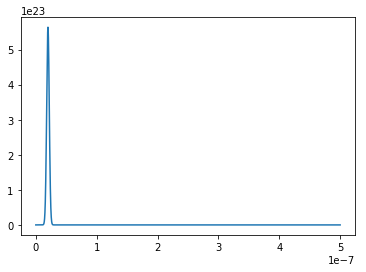

In [142]:

FWHM = 5e-9
sig = FWHM/(2*np.sqrt(2*np.log(2)))
I0 = 3e15
FA= 0.41
d = 1e-5 # cm-2

t0 = 20e-9
dt = .1e-9
t = np.arange(0,500e-9,dt)
p0 = (I0/(sig*np.sqrt(2*np.pi)))
power = p0*np.exp(-((t-t0)**2)/(2*(sig**2)))

plt.plot(t,power)



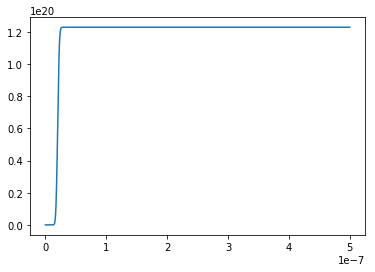

In [143]:
dng = (FA/d)*power

n0 = np.zeros(len(dng))

for i in range(len(power)):
    n0[i] = np.trapz(dng[:i], t[:i])
    
plt.plot(t,n0)

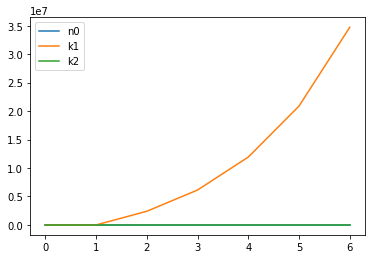

In [144]:
k1 = 1.5e7
k2 = 6e-11 

def dnr(n,k1,k2):
    return -k1*n - k2*n**2

dnr_0 = dnr(n0,k1,k2)

plt.plot(n0[0:7], label = 'n0')
plt.plot(k1*n0[0:7], label = 'k1')
plt.plot(k2*n0[0:7]**2, label = 'k2')

plt.legend()

(10000000000000.0, 1e+20)

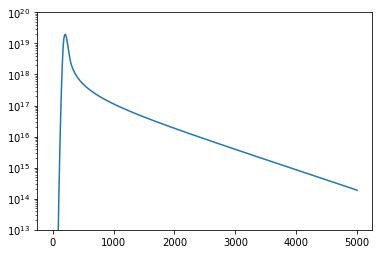

In [146]:
n = np.zeros(1)

n_t = np.zeros(1)

for i in range(1,len(t)):
    dng_t = dng[:i-1]
    dnr_t = dnr(n[:i-1],k1,k2)
#     print(n)
#     print(dng_t,'\n',dnr_t)
#     print('\n')
    n = np.append(n,np.trapz((dng_t + dnr_t)*dt))
    
plt.plot(n)
plt.yscale('log')
plt.ylim(1e13,1e20)